<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/mnist_deep_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimalna sieć neruonowa

In [1]:
import numpy as np 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# reshape dataset and convert to float32
x_train = x_train.reshape((60000,784)).astype('float32')/255.
x_test = x_test.reshape((10000,784)).astype('float32')/255.

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(y_test)

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000,)
(10000, 784) (10000,)
[7 2 1 ... 4 5 6]
(60000, 10) (10000, 10)


Definiujemy sieć

In [18]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

Kompilacja sieci

In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Trening sieci

In [20]:
epochs = 20
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2674 - accuracy: 0.9173 - val_loss: 0.1088 - val_accuracy: 0.9667
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1164 - accuracy: 0.9667 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0881 - accuracy: 0.9751 - val_loss: 0.0842 - val_accuracy: 0.9778
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.0806 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9817 - val_loss: 0.0904 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0627 - accuracy: 0.9829 - val_loss: 0.0859 - val_accuracy: 0.9799
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0590 - accuracy: 0.9840 - val_loss: 0.0879 - val_accuracy: 0.9808
Epoch 

Wyniki

In [7]:
score = model.evaluate(x_test, y_test)
print("Test loss & accuracy: ",score)

score = model.evaluate(x_train, y_train)
print("Test loss & accuracy: ",score)

313/313 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.9786
Test loss & accuracy:  [0.19090938568115234, 0.978600025177002]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0139 - accuracy: 0.9962
Test loss & accuracy:  [0.01390136033296585, 0.996150016784668]


In [13]:
print(history.history['loss'])

[0.27068689465522766, 0.10120199620723724, 0.0758095532655716, 0.06128053367137909, 0.056475669145584106, 0.05217241868376732, 0.042585693299770355, 0.04198526591062546, 0.038400210440158844, 0.03314526006579399, 0.0346762016415596, 0.02910357527434826, 0.028658339753746986, 0.032205481082201004, 0.02658560313284397, 0.023736631497740746, 0.024805866181850433, 0.02358066290616989, 0.025091778486967087, 0.024341989308595657]


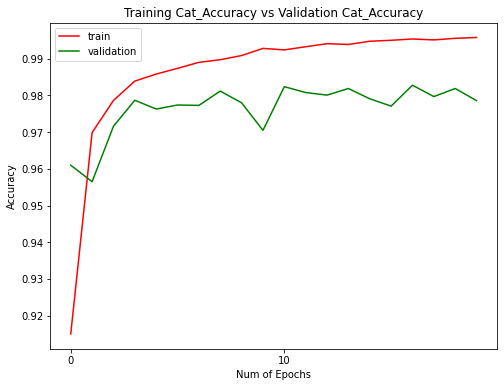

In [14]:
import matplotlib.pyplot as plt


# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])

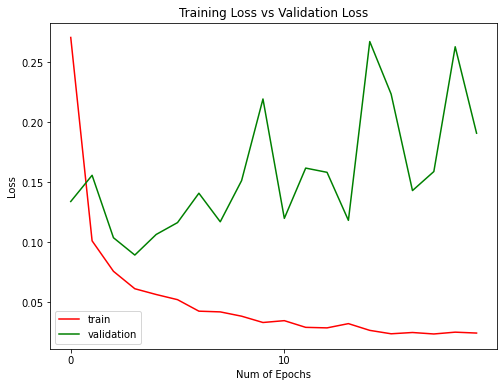

In [12]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()
